<a href="https://colab.research.google.com/github/chychur/Lineare_Regression/blob/main/Hw3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Домашня робота №3
## Аналіз данних (лінійна регресія)

Проведкмо аналіз файлу [Housing.csv](https://drive.google.com/file/d/1-rAa4XT4_fI0dOBlMNuE6a7jB0wln_Qo/view "Будинки"). Файл містить дані про будинки: цінуціну залежно від площі, кількості ванних кімнат, спалень.

Необхідно проаналізувати датасет (використовуючи лінійну регресією) і визначити:

* написати функцію гіпотези лінійної регресії у векторному вигляді;
* створити функцію для обчислення функції втрат у векторному вигляді;
* реалізувати один крок градієнтного спуску;
* знайти найкращі параметри $\vec{w}$ для датасету прогнозуючу ціну на будинок залежно від площі, кількості ванних кімнат та кількості спалень;
* знайти ті ж параметри за допомогою аналітичного рішення;
* порівняти отримані результати.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [91]:
#presetings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


URL = "/content/drive/MyDrive/Colab Notebooks/Housing.csv"
df = pd.read_csv(URL)

In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# 1. Валідація даних

1.1 Прочитаємо вміст датасету.

In [8]:
df.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


1.2 Визначимо розмір датасету.

In [5]:
df.shape

(545, 13)

1.3 Визначимо типи данних датасету.

In [6]:
df.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

1.4 Визначимо частку пропусків в датасеті.

In [7]:
missing_prc = df.apply(lambda column: column.isnull().sum() / len(df) * 100)
missing_prc

price               0.0
area                0.0
bedrooms            0.0
bathrooms           0.0
stories             0.0
mainroad            0.0
guestroom           0.0
basement            0.0
hotwaterheating     0.0
airconditioning     0.0
parking             0.0
prefarea            0.0
furnishingstatus    0.0
dtype: float64

1.5 Зобразимо данні з датасету в залежності ціна - площа (`price` - `area`)

<Axes: xlabel='area', ylabel='price'>

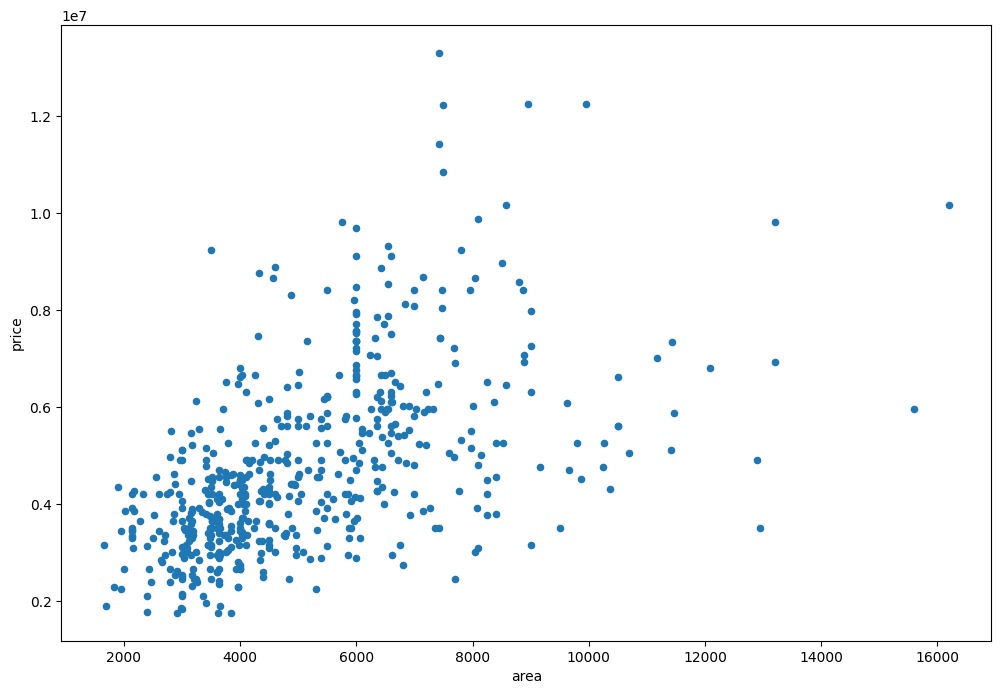

In [ ]:
df.plot(x='area', y='price', kind='scatter', figsize=(12,8))

1.6 ВИСНОВОК: датасет без пропусків, розміром 13 колонок і 545 строчок, з відповідними типами данних, що допустимі для подальшої обробки.

# 2. Функція гіпотези лінійної регресії у векторному вигляді

2.1 Лінійна регресія. Вступ.

Для знаходження рівняння прямої (лінії), яка буде найкраще описувати залежність між двома величинами введемо такі позначення:

* $x^{(i)}$ - ознака (feature) $i$-ого прикладу (sample, example) з нашого датасету, також відома яка вхідна змінна;
* $y^{(i)}$ - цільове значення для $i$-ого прикладу, чи вихідне значення (target, output value);
* $(x^{(i)},y^{(i)})$ - $i$-ий навчальний приклад, де $i=1...m$ - множина навчальних даних, чи training set, а $m$ - кількість прикладів у цій множині.

Тепер гіпотезу лінійної регресії, що описує залежність між двома величинами можна сформулювати так:

$$h(x) = w_{0} + w_{1} * x$$

де, $w_0$ та $w_1$ $-$ коефіцієнти ваги.

А для більш точної і складної моделі, в якій присутні кілька параметрів скористаємось лінійною регресією з багатьма змінними. Тоді наші дані будуть мати інший вигляд:


*   $x^{(i)}$ - $j$-а ознака (фіча) $i$-ого прикладу (sample, example) з нашого датасету;
*   $\vec{x}^{(i)}$ - вектор ознак для $i$-ого прикладу, і тепер це буде наш вхідний вектор значень;
* $m$ - кількість прикладів у нашому датасеті;
* $n$ - кількість ознак для прикладів у датасеті.

Отже, нова гіпотеза буде мати такий вигляд:

$$h(\vec{x})=w_{0} + w_{1}x_{1} + w_{2}x_{2} +w_{3}x_{3} + ... + w_{n}x_{n}$$

Введемо додаткову ознаку $x_{0}=1$, щоб ввести позначення вектора вагів та повний вектор ознак:

$$\vec{x}=
\begin{pmatrix}
1 \\ x_{1} \\ x_{2} \\ x_{3} \\ ... \\ x_{n}
\end{pmatrix},
\hspace{1cm}
\vec{w}=
\begin{pmatrix}
w_{0} \\ w_{1} \\ w_{2} \\ w_{3} \\ ... \\ w_{n}
\end{pmatrix}
\hspace{1cm}
$$

​

І перепишемо гіпотезу у векторному вигляді, оскільки це буде просто скалярний добуток вектору вагів на вектор ознак:


$$h(\vec{x})=\vec{w}*\vec{x}$$

Для знаходження оптимальних значень коефіцієнтів $\vec{w}$ скористаємось *методом градієнтного спуску*. Вектор-градієнт функції втрат (`loss_func`) буде мати такий вигляд:

$$\nabla{J}(\vec{w})=
\begin{pmatrix}
\frac{\partial{J}(\vec{w})}{\partial{w_{0}}} \\
\frac{\partial{J}(\vec{w})}{\partial{w_{1}}} \\
\frac{\partial{J}(\vec{w})}{\partial{w_{2}}} \\
\vdots \\
\frac{\partial{J}(\vec{w})}{\partial{w_{n}}}
\end{pmatrix}
\hspace{0.5cm}=
\begin{pmatrix}
\frac{1}{m}\sum^m_{i=1}(h(x^{(i)})-y^{(i)}) \\
\frac{1}{m}\sum^m_{i=1}(h(x^{(i)})-y^{(i)})*x^{(i)}_{1} \\
\frac{1}{m}\sum^m_{i=1}(h(x^{(i)})-y^{(i)})*x^{(i)}_{2} \\
\vdots \\
\frac{1}{m}\sum^m_{i=1}(h(x^{(i)})-y^{(i)})*x^{(i)}_{n}
\end{pmatrix},
\hspace{1cm}$$

Відповідно, одна ітерація навчання моделі, чи *крок градієнтного спуску* буде мати такий вигляд:

$$\vec{w}=\vec{w}^{prev}- \alpha\nabla{J}(\vec{w})$$

Проте, для простоти, можна вивести матрицю значень нашого датасету, що дає змогу робити векторні обчислення, замість сумування циклами:

$$X=
\begin{bmatrix}
 1 & x^{(1)}_{1} & x^{(1)}_{2} & x^{(1)}_{3} & \cdots & x^{(1)}_{n}\\
 1 & x^{(2)}_{1} & x^{(2)}_{2} & x^{(2)}_{3} & \cdots & x^{(2)}_{n}\\
 1 & x^{(3)}_{1} & x^{(3)}_{2} & x^{(3)}_{3} & \cdots & x^{(3)}_{n}\\
 \vdots & \vdots & \vdots & \vdots & \ddots & \vdots \\
 1 & x^{(m)}_{1} & x^{(m)}_{2} & x^{(m)}_{3} & \cdots & x^{(m)}_{n}\\  
\end{bmatrix}
$$

Тоді матимемо такі формули для обчислень:

$$\nabla{J}(\vec{w})=\frac{1}{m}X^T(X\vec{w}-\vec{y})$$

Якщо переписати гіпотезу у матричному вигляді:

$$\vec{h}(X)=X\vec{w}$$

і порівнявши отримані значення з вектором цільових значень, то отримаємо матричне рівняння $y=Xw$, розвязавши яке, отримаємо аналітичне рішення:

$$\vec{w^*}=(X^TX)^{-1}X^T\vec{y}$$

де, вираз $(X^TX)^{-1}X^T\vec{y}$ - *псевдообернена матриця*. Для знаходження рішення, необхідно обчислювати зворотну матрицю на що буде потрібно порядку $k^{3}$ операцій при квадратній матриці розміру $k$. На реальних даних це досить невигідно. Крім того, якщо матриця погано обумовлена, ми не можемо використовувати чисельні методи обернення. Тому вирішення задачі мінімізації функції помилки знаходять за допомогою методів оптимізації, як градієнтний спуск.

2.2 Виберемо параметри `features` (відповідно до умови задачі це - `area`, `bedrooms` та `bathrooms`), від яких залежить значення ціни будинку `price`.

In [14]:
features = ['area', 'bedrooms','bathrooms']

2.3 Створимо новий датасет `X`, що є вхідним вектором значень з векторами ознак для $i$-ого прикладу.

In [15]:
X = df[features].values
X

array([[7420,    4,    2],
       [8960,    4,    4],
       [9960,    3,    2],
       ...,
       [3620,    2,    1],
       [2910,    3,    1],
       [3850,    3,    1]])

2.4 Створимо проміжний вектор `X_one` з ознакою $x_0=1$

In [20]:
X_one = np.ones((X.shape[0], 1))
X_one[:6]

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]])

2.5 Доповнимо вектор вхідних значень (`X`) вектором (`X_one`), що містить додаткові значення $x_{0}=1$ для $i$-го прикладу.

In [21]:
X = np.concatenate((X_one, X), axis=1).astype('int64')
X

array([[   1, 7420,    4,    2],
       [   1, 8960,    4,    4],
       [   1, 9960,    3,    2],
       ...,
       [   1, 3620,    2,    1],
       [   1, 2910,    3,    1],
       [   1, 3850,    3,    1]])

2.6 Створимо вектор цільових значень `y`.

In [26]:
y = df["price"].values.reshape(-1, 1)
y[:6]

array([[13300000],
       [12250000],
       [12250000],
       [12215000],
       [11410000],
       [10850000]])

2.7 Створимо матрицю початкових ваг `theta`.

In [41]:
theta = np.zeros((X.shape[1], 1))
theta

array([[0.],
       [0.],
       [0.],
       [0.]])

2.8 Визначимо функцію гіпотези лінійної регресії `hipotesis`, як раніше зазначено, це буде скалярний добуток вектору вагів $\vec{w}$ на вектор ознак $\vec{x}$:

In [30]:
def hypothesis(theta, X):
    return np.dot(X, theta)

2.9 Визначимо функцію втрат `loss_func`, що приймає матрицю початкових ваг `theta`, вектор вхідних значень `X` та вектор цільових значнь `y`:

In [32]:
def loss_func(theta, X, y):
    m = len(y)
    predictions = hypothesis(theta, X)
    return (1 / (2 * m)) * np.sum(np.square(predictions - y))

2.10 Визначимо крок градієнтного спуску `grad_step`:

In [33]:
def grad_step(theta, X, y, learning_rate):
    m = len(y)
    predictions = hypothesis(theta, X)
    error = predictions - y
    gradient = (1 / m) * np.dot(X.T, error)
    theta -= learning_rate * gradient
    return theta

# 3. Навчання моделі

3.1 Визначимо папметри навчання моделі:
`learning_rate` - крок навчання (крок градієнтного спуску) `num_iterations` - кількість ітерацій.

In [86]:
learning_rate = 0.0000000001
num_iterations = 1000

3.2 Виконаємо навчання моделі, покроково, методом градієнтного спуску, для цього використаємо функцію одного кроку градієнтного спуску `grad_step` для знаходження вектору вагів $\vec{w}$ та функцію втрат `loss_func` на кожній ітерації. Для зручності, запишемо результати в новий датафрейм `loss_h` і виведемо кожне 50-е значення.

In [92]:
loss_history = []

for i in range(num_iterations):
    theta = grad_step(theta, X, y, learning_rate)

    loss = loss_func(theta, X, y)
    loss_history.append(loss)

loss_h = pd.DataFrame(loss_history, columns=['Loss_value'])

In [54]:
loss_h[::50]

,Loss_value
0,1.673380e+12
50,1.673380e+12
100,1.673380e+12
150,1.673380e+12
200,1.673380e+12
250,1.673380e+12
300,1.673380e+12
350,1.673380e+12
400,1.673380e+12
450,1.673380e+12


3.3 Визначимо значення коефіцієнтів ваги `theta` ($\vec{w}$) після навчання методом градієнтного спуску:

In [88]:
theta

array([[ 34.88210173],
       [855.62228325],
       [132.17464686],
       [ 74.3600023 ]])

3.4 Виконаємо розрахунок коефіцієнтів ваги ($\vec{w}$) аналітичним методом:

In [80]:
theta_a = np.linalg.inv(X.T @ X) @ X.T @ y

3.5 Визначимо значення коефіцієнтів ваги ($\vec{w}$), знайдених аналітичним методом:

In [81]:
theta_a

array([[-1.73171608e+05],
       [ 3.78762754e+02],
       [ 4.06820034e+05],
       [ 1.38604950e+06]])

# 4. Порівняння результатів дослідження

4.1 Порівняємо значення коефіцієнтів ваги ($\vec{w}$), отриманих шляхом навчання моделі методом градієнтного спуску (п. 3.3) та за допомогою аналітичного методоу (п. 3.5). Реалізуємо прогноз за допомогою функції гіпотези (п. 2.8) для `theta` та `theta_a`, також, використовуючи вектор вхідних параметрів `X`.

In [89]:
predict_gradient = hypothesis(theta, X)
predict_analytic = hypothesis(theta_a, X)

4.2 Виведемо результати на графік

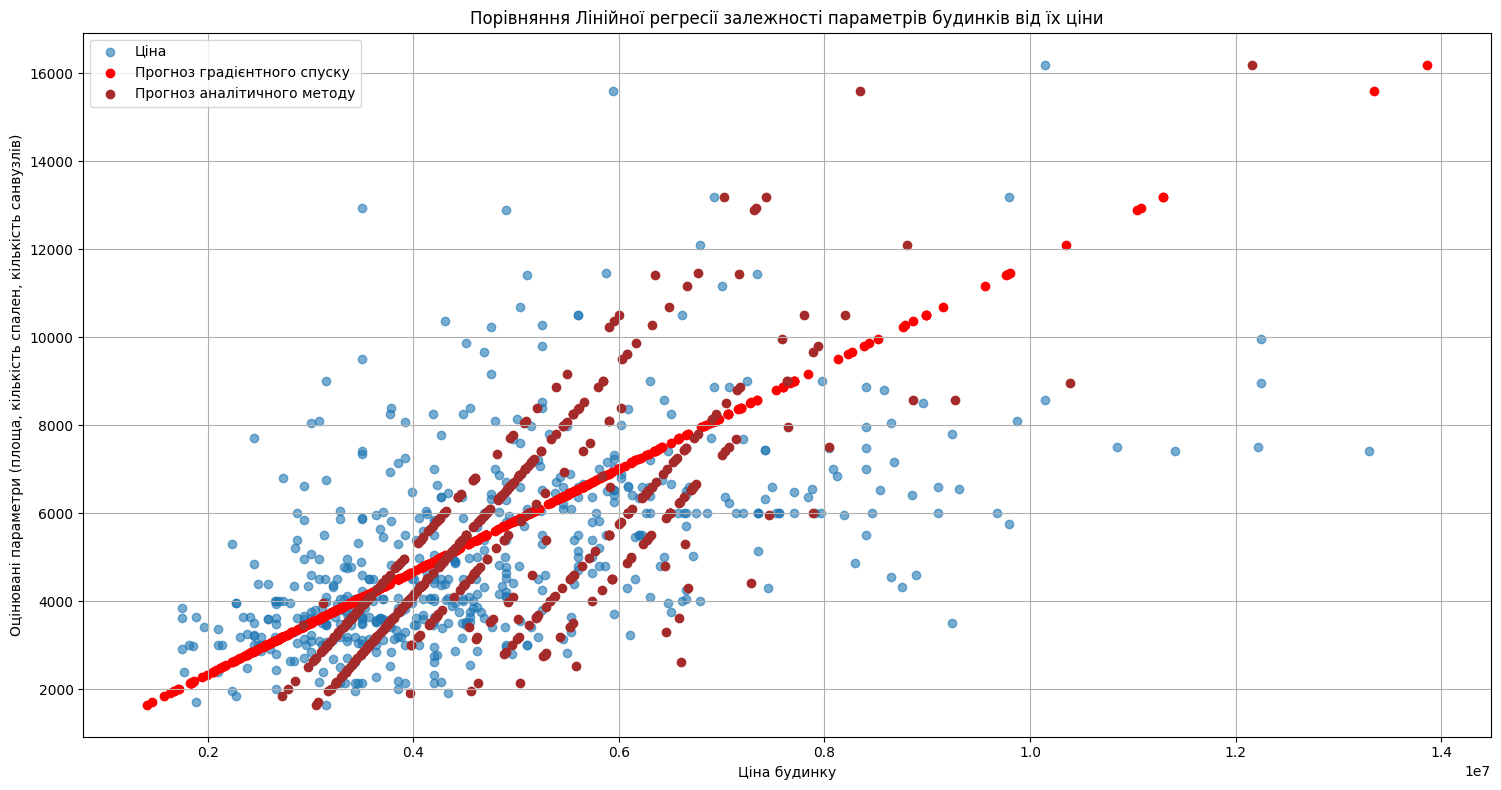

In [90]:
plt.figure(figsize=(15, 8))
plt.title("Порівняння Лінійної регресії залежності параметрів будинків від їх ціни")
plt.xlabel("Ціна будинку")
plt.ylabel("Оцінювані параметри (площа, кількість спален, кількість санвузлів)")

plt.grid(True)
plt.tight_layout()

plt.scatter(y, X[:, 1],
            label="Ціна",
            alpha=0.6)


plt.scatter(predict_gradient,
            X[:, 1],
            label='Прогноз градієнтного спуску',
            color='red')

plt.scatter(predict_analytic,
            X[:, 1],
            label='Прогноз аналітичного методу',
            color='brown')

plt.legend()
plt.show()